In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cifar_10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar_10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

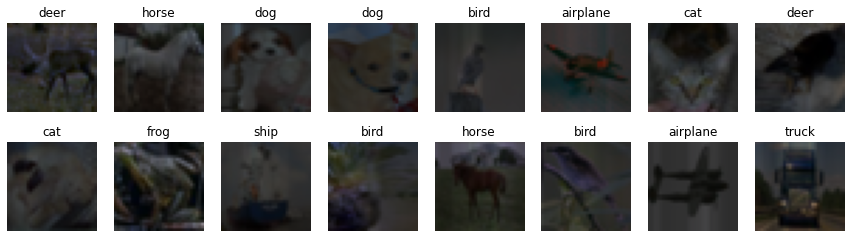

In [4]:
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index],cmap=plt.cm.binary)
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [5]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.LeakyReLU(0.1))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same'))
model.add(tf.keras.layers.LeakyReLU(0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same'))
model.add(tf.keras.layers.LeakyReLU(0.1))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(tf.keras.layers.LeakyReLU(0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.LeakyReLU(0.1))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

In [7]:
INIT_LR = 5e-3  
BATCH_SIZE = 32
EPOCHS = 10

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adamax(lr=INIT_LR),
    metrics=['accuracy'] 
)

def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler)],
    validation_data=(x_test, y_test),
    shuffle=True
)

Epoch 1/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5848 - accuracy: 0.4292 - val_loss: 1.1634 - val_accuracy: 0.5902 - lr: 0.0050
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1234 - accuracy: 0.6047 - val_loss: 0.9695 - val_accuracy: 0.6604 - lr: 0.0045
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9539 - accuracy: 0.6672 - val_loss: 0.8479 - val_accuracy: 0.7021 - lr: 0.0041
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8518 - accuracy: 0.7027 - val_loss: 0.8598 - val_accuracy: 0.7012 - lr: 0.0036
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7848 - accuracy: 0.7276 - val_loss: 0.7689 - val_accuracy: 0.7330 - lr: 0.0033
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7266 - accuracy: 0.7461 - val_loss: 0.7405 - val_accuracy: 0.7430 - lr: 0.0030
Epoch 7/10
1563/1563 [=============================